In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [5]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [6]:
df_skill_lists = df_skills.copy()

for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)
        
df_skill_lists.loc['Total'] = df_skill_lists.sum()
    
df_skill_lists.iloc[:, 2:]

,excel,sql,python,r,aws,airflow
0,1,1,1,0,0,0
1,0,0,1,1,0,0
2,0,0,1,0,1,1
Total,1,1,3,1,1,1


<Axes: xlabel='job_skills'>

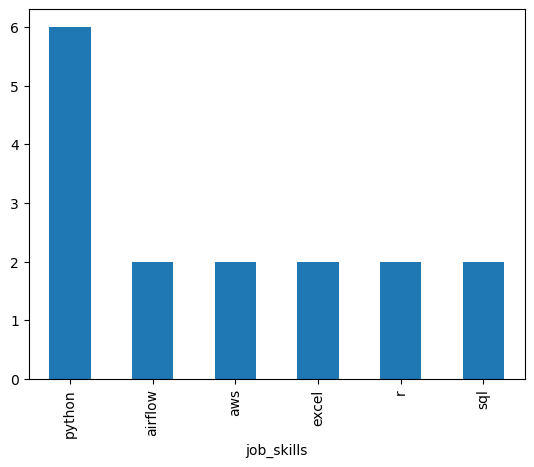

In [7]:
df_skill_lists.explode('job_skills').value_counts('job_skills').plot(kind='bar')

In [8]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [9]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

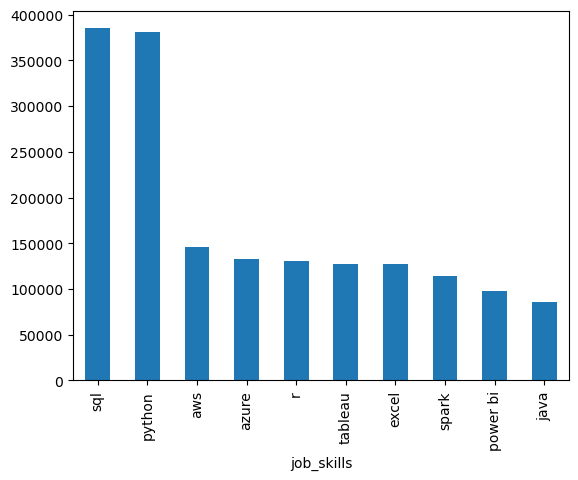

In [10]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [11]:
skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()

type(skills_count)

pandas.core.series.Series

In [12]:
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


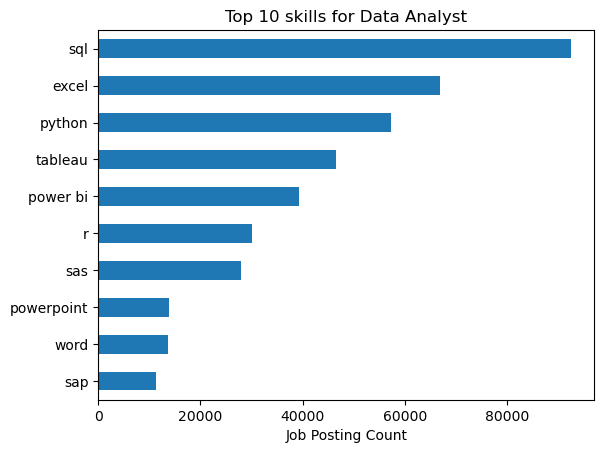

In [13]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')

plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()


In [26]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [29]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

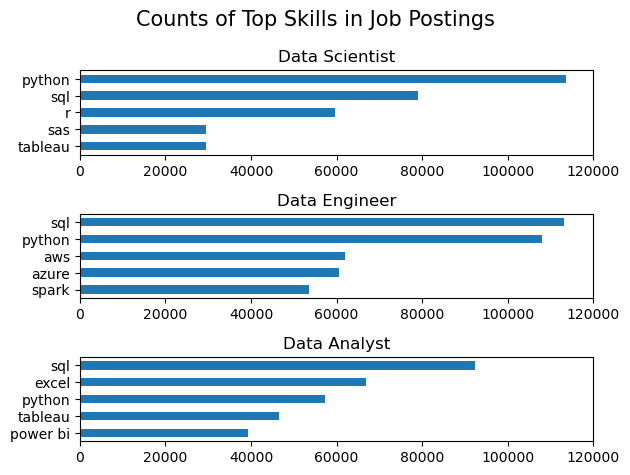

In [44]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()
